# Mundo 26

### Análise de dados

### Corr e cov: como calcular a matriz de correlação entre ações e traçar as janelas de correlação entre o Ibovespa e o S&P500 desde 2000

In [2]:
import pandas as pd
import yfinance as yf
import numpy as np

In [4]:
acoes = ['WEGE3.SA', 'VALE3.SA', 'PETR4.SA', 'LREN3.SA', 'PETR3.SA']

dados_acoes = yf.download(acoes,"2019-08-31","2022-08-31")["Adj Close"]

dados_acoes

[*********************100%***********************]  5 of 5 completed


,LREN3.SA,PETR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2019-09-02,46.382145,13.393439,11.774333,32.652649,10.867147
2019-09-03,45.838535,13.460480,11.913948,32.304905,10.585689
2019-09-04,46.547989,13.800460,12.221106,33.014595,10.795592
2019-09-05,46.299229,13.886654,12.281607,33.014595,10.867147
2019-09-06,46.041241,13.977637,12.342105,32.964916,10.895771
...,...,...,...,...,...
2022-08-24,26.540895,33.325905,29.433241,66.264282,28.504646
2022-08-25,26.901533,32.987930,29.118259,67.551544,28.663061
2022-08-26,27.096472,33.317009,29.433241,66.537346,28.524446


In [5]:
retornos = dados_acoes.pct_change().dropna()

retornos

,LREN3.SA,PETR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2019-09-03,-0.011720,0.005005,0.011858,-0.010650,-0.025900
2019-09-04,0.015477,0.025258,0.025781,0.021968,0.019829
2019-09-05,-0.005344,0.006246,0.004951,0.000000,0.006628
2019-09-06,-0.005572,0.006552,0.004926,-0.001505,0.002634
2019-09-09,-0.009606,0.019870,0.015460,0.031001,-0.011383
...,...,...,...,...,...
2022-08-24,0.008518,0.006717,0.005981,-0.032189,-0.000347
2022-08-25,0.013588,-0.010141,-0.010702,0.019426,0.005558
2022-08-26,0.007246,0.009976,0.010817,-0.015014,-0.004836


In [6]:
retornos.corr()

,LREN3.SA,PETR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
LREN3.SA,1.000000,0.478609,0.472304,0.264767,0.371440
PETR3.SA,0.478609,1.000000,0.977128,0.554033,0.380044
PETR4.SA,0.472304,0.977128,1.000000,0.548374,0.385850
VALE3.SA,0.264767,0.554033,0.548374,1.000000,0.278462
WEGE3.SA,0.371440,0.380044,0.385850,0.278462,1.000000


In [7]:
retornos.cov()

,LREN3.SA,PETR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
LREN3.SA,0.000929,0.000484,0.000460,0.000218,0.000312
PETR3.SA,0.000484,0.001100,0.001034,0.000496,0.000348
PETR4.SA,0.000460,0.001034,0.001019,0.000473,0.000340
VALE3.SA,0.000218,0.000496,0.000473,0.000730,0.000208
WEGE3.SA,0.000312,0.000348,0.000340,0.000208,0.000761


In [16]:
acoes = ['WEGE3.SA', 'VALE3.SA', 'PETR4.SA', 'LREN3.SA', 'PETR3.SA', '^BVSP']

dados_acoes=yf.download(acoes,"2011-08-31","2022-08-31")["Adj Close"]

retornos = dados_acoes.pct_change().dropna()

retorno_ibov = retornos['^BVSP']

retornos = retornos.drop('^BVSP',axis=1)

corr_movel = retornos.rolling(252).corr(retorno_ibov)

corr_movel = corr_movel.dropna()

corr_movel

[*********************100%***********************]  6 of 6 completed


,LREN3.SA,PETR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2012-09-05,0.599553,0.726631,0.690375,0.746084,0.413964
2012-09-06,0.595283,0.730280,0.692669,0.751661,0.404139
2012-09-10,0.589364,0.727936,0.689342,0.752009,0.401404
2012-09-11,0.583259,0.728183,0.690267,0.746281,0.401504
2012-09-12,0.576350,0.727087,0.689421,0.744099,0.392004
...,...,...,...,...,...
2022-08-24,0.628161,0.631146,0.632133,0.514074,0.491119
2022-08-25,0.628504,0.633567,0.631743,0.514253,0.491150
2022-08-26,0.625452,0.633532,0.629079,0.509816,0.494988


<AxesSubplot: xlabel='Date'>

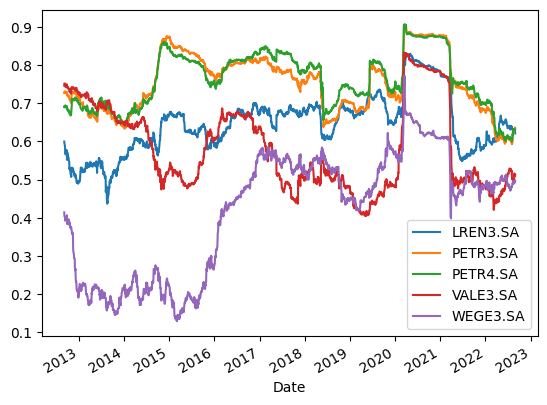

In [17]:
corr_movel.plot()

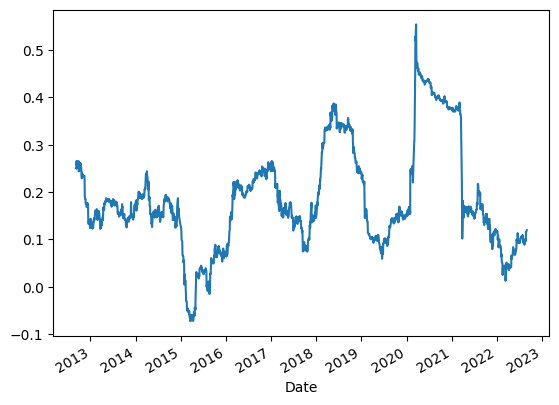

In [18]:
cor_weg_vale = retornos['WEGE3.SA'].rolling(252).corr(retornos['VALE3.SA']).dropna().plot()

# Exercícios 
<BR>
    
* Exercício 84: Puxe os dados de ITUB3, ITUB4, SANB11, WEGE3 e ABEV3 e calcule a matriz de correlação de 36 meses entre os retornos diários das ações.
<BR>
    
* Exercício 85: Calcule a correlação móvel de 12 meses entre o Ibovespa e o S&P500 desde 01/01/2000.

In [14]:
acoes = ["ITUB3.SA","ITUB4.SA","SANB11.SA","WEGE3.SA","ABEV3.SA"]

dados_acoes = yf.download(acoes,"2019-08-31","2022-08-31")['Adj Close']

retornos = dados_acoes.pct_change().dropna()

retornos.corr()

[*********************100%***********************]  5 of 5 completed


,ABEV3.SA,ITUB3.SA,ITUB4.SA,SANB11.SA,WEGE3.SA
ABEV3.SA,1.000000,0.535798,0.523857,0.527553,0.404586
ITUB3.SA,0.535798,1.000000,0.953964,0.783744,0.349860
ITUB4.SA,0.523857,0.953964,1.000000,0.829297,0.314899
SANB11.SA,0.527553,0.783744,0.829297,1.000000,0.329978
WEGE3.SA,0.404586,0.349860,0.314899,0.329978,1.000000


[*********************100%***********************]  2 of 2 completed


<AxesSubplot: xlabel='Date'>

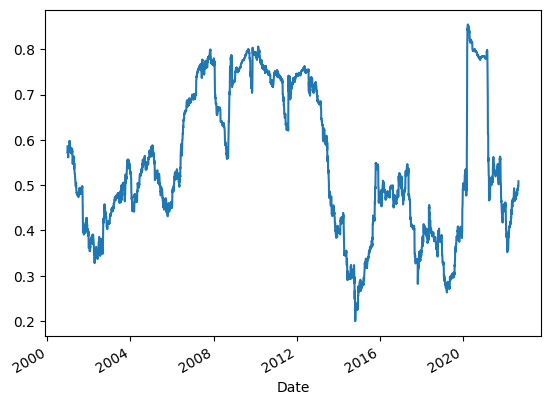

In [20]:
acoes = ["^GSPC","^BVSP"]

dados_indices = yf.download(acoes,"2000-01-01", "2022-08-31")['Adj Close']

retornos = dados_indices.pct_change().dropna()

corr_movel = retornos["^BVSP"].rolling(252).corr(retornos["^GSPC"]).dropna()

corr_movel.plot()